# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
initial_unique_mice = merge_data['Mouse ID'].nunique()

In [5]:
# Checking the number of mice.
cleaned_data = merge_data.drop_duplicates(subset= ['Mouse ID', 'Timepoint'])
cleaned_unique_mice = cleaned_data['Mouse ID'].nunique()
print(f"Initial unique mice ID: {initial_unique_mice}")
print(f"Unique mice IDs after cleaning: {cleaned_unique_mice}")

Initial unique mice ID: 249
Unique mice IDs after cleaning: 249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merge_data[merge_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(f"Duplicate mice entries: \n{duplicate_mice}")

Duplicate mice entries: 
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21   

In [7]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id = merge_data[merge_data['Mouse ID'].isin(duplicate_mice['Mouse ID'])]
print(duplicate_mouse_id)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294        

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
cleaned_data = merge_data[~merge_data['Mouse ID'].isin(duplicate_mouse_ids)]

In [10]:
# Checking the number of mice in the clean DataFrame.
cleaned_unique_mice = cleaned_data['Mouse ID'].nunique()
print(f"Unique mice ID's after cleaning data: {cleaned_unique_mice}")

Unique mice ID's after cleaning data: 248


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = cleaned_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
print(summary_stats)

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})
print(summary_stats_advanced)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

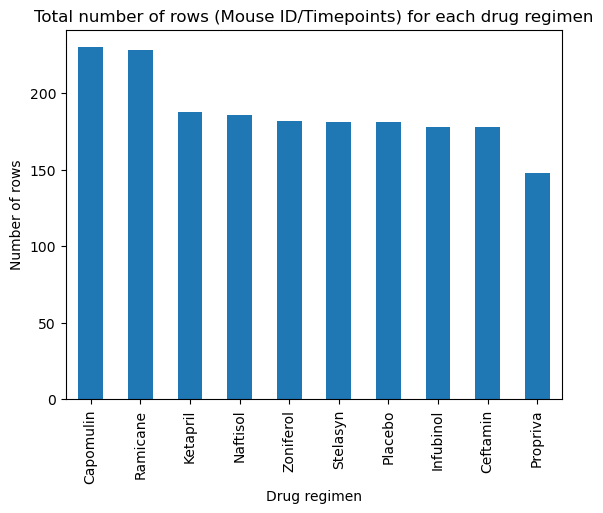

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_count = cleaned_data['Drug Regimen'].value_counts()
bar_plot = drug_regimen_count.plot(kind='bar', title='Total number of rows (Mouse ID/Timepoints) for each drug regimen')
plt.xlabel('Drug regimen')
plt.ylabel('Number of rows')
plt.show()

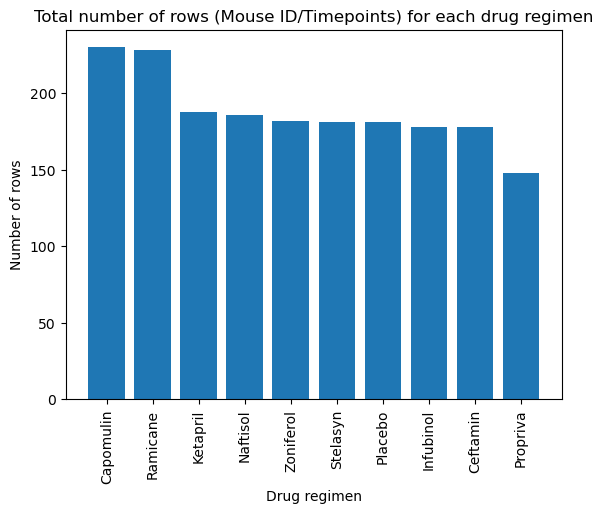

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_count = cleaned_data['Drug Regimen'].value_counts()
plt.bar(drug_regimen_count.index, drug_regimen_count.values)
plt.title('Total number of rows (Mouse ID/Timepoints) for each drug regimen')
plt.xlabel('Drug regimen')
plt.ylabel('Number of rows')
plt.xticks(rotation=90)
plt.show()

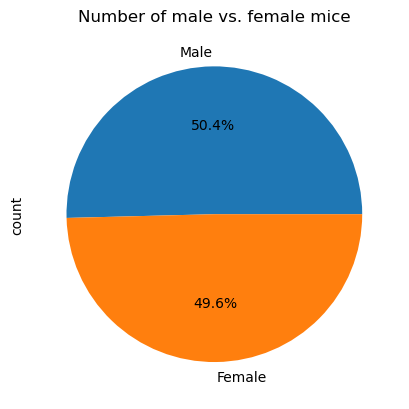

In [19]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice_gender['Sex'].value_counts()

# Make the pie chart
pie_chart = gender_counts.plot(kind='pie', autopct='%1.1f%%', title='Number of male vs. female mice')
plt.show()

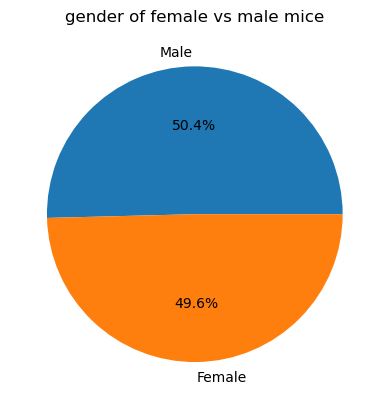

In [20]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice_gender['Sex'].value_counts()
# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('gender of female vs male mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max()
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor = last_timepoint_df[last_timepoint_df['Drug Regimen'].isin(treatment_regimens)]
final_tumor.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_regimens:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = final_tumor[final_tumor['Drug Regimen'] == drug]['Tumor Volume (mm3)']

    # add subset
tumor_vol.append(drug_data)
quartiles = drug_data.quantile([0.25, 0.5, 0.75])
lowerquartile = quartiles[0.25]
upperquartile = quartiles[0.75]
iqr = upperquartile - lowerquartile
lower_bound = lowerquartile - (1.5 * iqr)
upper_bound = upperquartile + (1.5 * iqr)

    # Determine outliers using upper and lower bounds
outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
print(f"{drug} outliers: {outliers}")

Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


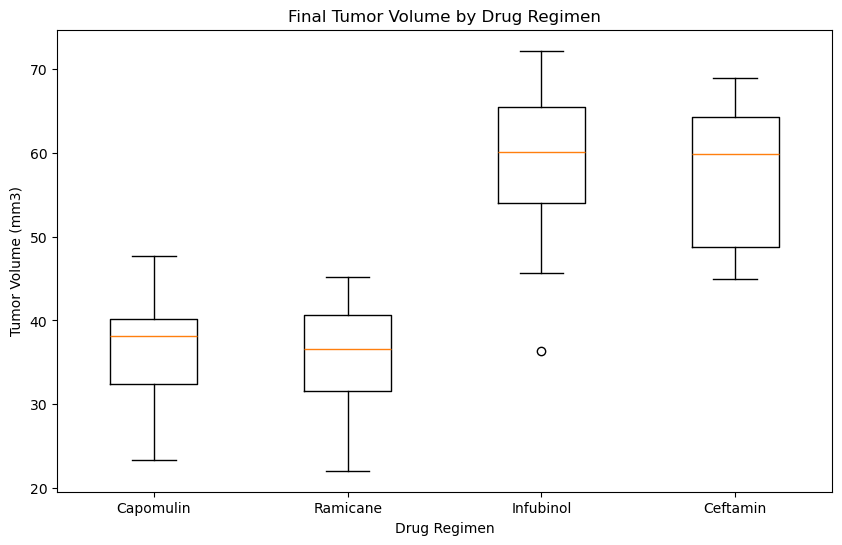

In [34]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = [final_tumor[final_tumor['Drug Regimen'] == drug]['Tumor Volume (mm3)'] for drug in treatment_regimens]
plt.figure(figsize=(10,6))
plt.boxplot(tumor_vol_data, labels=treatment_regimens)
plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

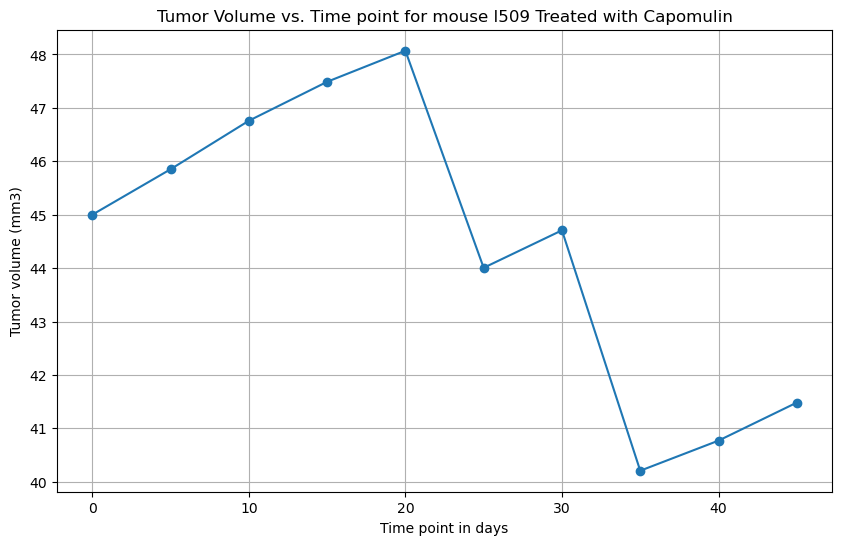

In [45]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
mouse_data = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == mouse_id )]
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title(f'Tumor Volume vs. Time point for mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Time point in days')
plt.ylabel('Tumor volume (mm3)')
plt.grid(True)
plt.show()

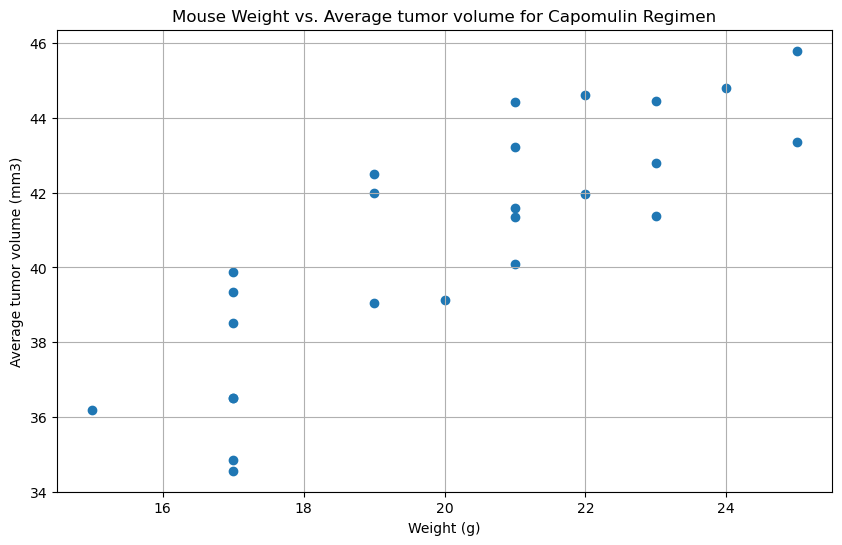

In [51]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_observation = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = Capomulin_observation.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()
plt.figure(figsize=(10,6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average tumor volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average tumor volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation coefficient: 0.8419363424694722


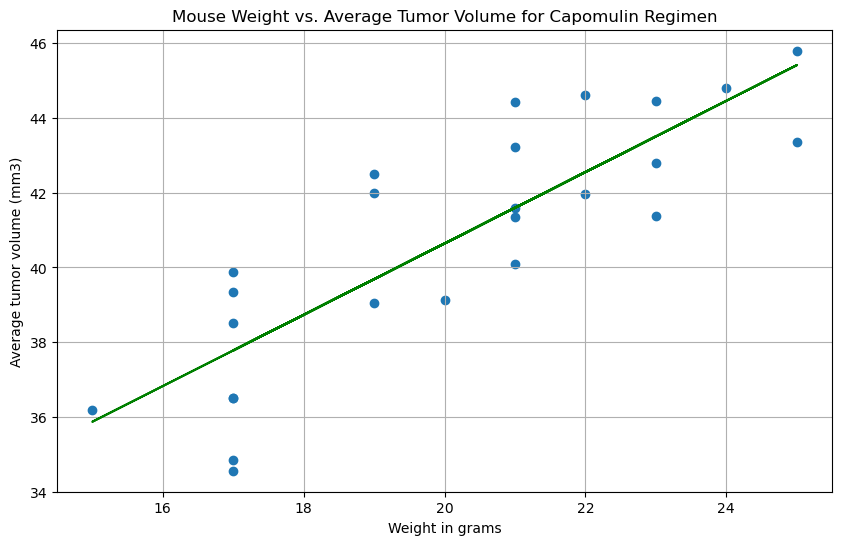

Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723
P-value: 1.3225722434712404e-07
Standard Error: 0.12754359033201323


In [61]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
Capomulin_regression = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = Capomulin_regression.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()
correlation = avg_tumor_volume['Weight (g)'].corr(avg_tumor_volume['Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation}")
regression = linregress(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
plt.figure(figsize=(10,6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
plt.plot(avg_tumor_volume['Weight (g)'], slope * avg_tumor_volume['Weight (g)'] + intercept, color='green')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight in grams')
plt.ylabel('Average tumor volume (mm3)')
plt.grid(True)
plt.show()

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")
